<a href="https://colab.research.google.com/github/MyraLugwiri/Beginner-Repo/blob/master/linkedin_connections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis & Visualisation of Linkedin Connection Data**

---


## Data Wrangling 

In [21]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df = pd.read_csv("/content/Connections.csv", skiprows=2)
df.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Victoria,Hareza,NaN,STEM Women,Event Coordinator,04 Jul 2022
1,Sabrina,Rodgers,NaN,Broadstreet Institute,CHNA Intern,21 Jun 2022
2,Millicent,Malinga,NaN,NaN,NaN,12 Jun 2022
3,Alasan,Ceesay,NaN,JULA FINANCE LTD,Branch Manager,07 Jun 2022
4,James,Djoteng,NaN,Freelancer- Self Employed,Master of Ceremonies,07 Jun 2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     277 non-null    object
 1   Last Name      277 non-null    object
 2   Email Address  5 non-null      object
 3   Company        236 non-null    object
 4   Position       236 non-null    object
 5   Connected On   281 non-null    object
dtypes: object(6)
memory usage: 13.3+ KB


**Data Quality Issues Identified**
1. We have 5 columns missing values
2. The column Email Address has so many null values
3. The column names have mixed cases and spaces between column name

In [6]:
df.describe()

,First Name,Last Name,Email Address,Company,Position,Connected On
count,277,277,5,236,236,281
unique,264,275,5,203,217,130
top,Abraham,Gaye,christabeladhiambo9@gmail.com,The African Leadership University,Managing Director,22 Nov 2021
freq,2,2,1,14,4,25


In [8]:
df.isnull().sum()

First Name         4
Last Name          4
Email Address    276
Company           45
Position          45
Connected On       0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Data Cleaning

Dropping missing values

In [11]:
df.dropna()

,First Name,Last Name,Email Address,Company,Position,Connected On
72,Christabel,Adhiambo,christabeladhiambo9@gmail.com,Africa Solutions Media Hub,Internship Trainee,18 Mar 2022
147,George,Niyingabira,georgeniyingabira@gmail.com,Prikkle Academy Rwanda,Communication Intern,22 Nov 2021
167,H.R.H 5 STAR. DUKE,JONATHAN M.EGALAL,jegalal95@gmail.com,GRAND TRIANGLEInc,Regional Director Of Operations,14 Nov 2021
219,🔊Mohamed Mahmoud,Banani,adnanbrandokhliva@gmail.com,Bright Network,Technology Intern,25 Jul 2021
234,Ahmed,Mohamed,a.mohamed@alustudent.com,Mastercard Foundation,Scholar,30 Jun 2021


The column names have mixed cases and spaces between column name

In [12]:
df.rename(columns={'First Name': 'first_name', 'Last Name': 'last_name', 'Email Address': 'email_address', 'Company': 'company', 'Position': 'position', 'Connected On': 'connected_on'}, inplace=True)

Drop the column email_address

In [14]:
df.head()

,first_name,last_name,email_address,company,position,connected_on
0,Victoria,Hareza,NaN,STEM Women,Event Coordinator,04 Jul 2022
1,Sabrina,Rodgers,NaN,Broadstreet Institute,CHNA Intern,21 Jun 2022
2,Millicent,Malinga,NaN,NaN,NaN,12 Jun 2022
3,Alasan,Ceesay,NaN,JULA FINANCE LTD,Branch Manager,07 Jun 2022
4,James,Djoteng,NaN,Freelancer- Self Employed,Master of Ceremonies,07 Jun 2022


In [ ]:
df.drop('email_address', inplace=True, axis=1)

## Data Visualisation 

Where do most of the connections work at?

In [45]:
company_count = df.company.value_counts()

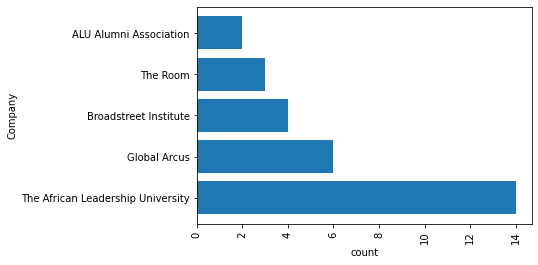

In [50]:
plt.barh(width=company_count.values[:5],  y=company_count.index[:5])
# plt.xticks(rotation=90)
plt.xlabel('count')
plt.ylabel('Company')
plt.title('The top 5 most common companies ');

What is the most common job title

In [52]:
position = df.position.value_counts()

Text(0.5, 1.0, 'The top 5 most common positions')

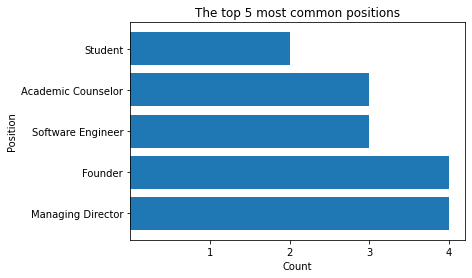

In [58]:
import numpy as np
labels  = np.arange(1, 5, 1)
plt.barh(width=position.values[:5], y=position.index[:5])
plt.xticks(labels)
plt.xlabel('Count')
plt.ylabel('Position')
plt.title('The top 5 most common positions')